In [1]:
%load_ext autoreload
%autoreload 2

import sys 
from os import getcwd, path
sys.path.append(path.dirname(getcwd()))
import matplotlib.pyplot as plt
import seaborn as sb
import pandas as pd
import numpy as np
%matplotlib inline

sb.set_context('paper')

In [2]:
from utils.paper import survival_hyper_label_printer, fishers_exact_hyper_label_printer, mann_whitney_hyper_label_printer

In [3]:
from utils import data
from cohorts.functions import missense_snv_count
cohort = data.init_cohort(normalized_per_mb=False, exclude_patient_ids=set(), only_patients_with_bams=False)
cohort_df = cohort.as_dataframe(on=missense_snv_count, join_with=['pdl1'])
cohort_df['Benefit'] = cohort_df['is_benefit']

{'dataframe_hash': -9059328030452674214,
 'provenance_file_summary': {u'cohorts': u'0.4.0+3.gda968fb',
                             u'isovar': u'0.0.6',
                             u'mhctools': u'0.3.0',
                             u'numpy': u'1.11.1',
                             u'pandas': u'0.18.1',
                             u'pyensembl': u'1.0.3',
                             u'scipy': u'0.18.1',
                             u'topiary': u'0.1.0',
                             u'varcode': u'0.5.10'}}
inner join with pdl1: 29 to 29 rows


Variants did not exist for patient 0979


Variants did not exist for patient 7592
Variants did not exist for patient 8214


In [4]:
cohort_df['5-factor score'].value_counts()

1.0    9
2.0    7
3.0    6
4.0    3
0.0    1
Name: 5-factor score, dtype: int64

In [5]:
def LiverMets(row):
    if np.isnan(row['Liver Mets']):
        return np.nan
    return row['Liver Mets'] > 0

def VisceralMets(row):
    if np.isnan(row['Visceral Mets']):
        return np.nan
    return row['Visceral Mets'] > 0

def FiveFactorScore01(row):
    if np.isnan(row['5-factor score']):
        return np.nan
    return row['5-factor score'] == 0 or row['5-factor score'] == 1

Has Liver Mets  False  True 
Response                    
DCB                 7      2
No DCB             11      9
Fisher's Exact Test: OR: 2.86363636364, p-value=0.411832545266 (two-sided)
{{{livermets_plot}}}
{{{livermets_benefit:22%}}}
{{{livermets_no_benefit:45%}}}
{{{livermets_fishers:n=29, Fisher's Exact p=0.41}}}


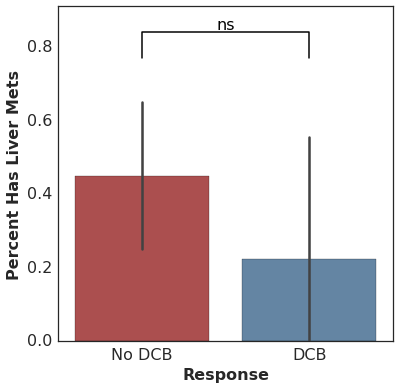

In [6]:
mets = cohort.plot_benefit({'Has Liver Mets': LiverMets}, plot_col = 'Has Liver Mets')
fishers_exact_hyper_label_printer(mets, 'livermets')

Has Visceral Mets  False  True 
Response                       
DCB                    6      3
No DCB                 4     16
Fisher's Exact Test: OR: 8.0, p-value=0.0316777675099 (two-sided)
{{{viseralmets_plot}}}
{{{viseralmets_benefit:33%}}}
{{{viseralmets_no_benefit:80%}}}
{{{viseralmets_fishers:n=29, Fisher's Exact p=0.032}}}


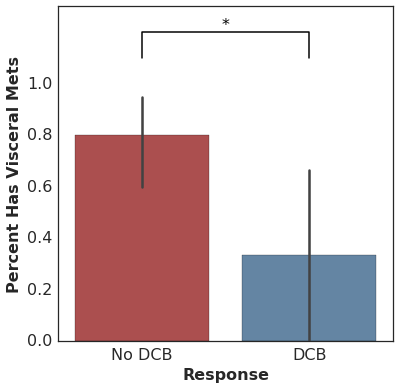

In [7]:
results = cohort.plot_benefit({'Has Visceral Mets': VisceralMets}, plot_col = 'Has Visceral Mets')
fishers_exact_hyper_label_printer(results, 'viseralmets')

Mann-Whitney test: U=94.0, p-value=0.865039871052 (two-sided)
{{{packyears_plot}}}
{{{packyears_benefit:10.00 (range 0.00-100.00)}}}
{{{packyears_no_benefit:12.50 (range 0.00-75.00)}}}
{{{packyears_mw:n=29, Mann-Whitney p=0.87}}}


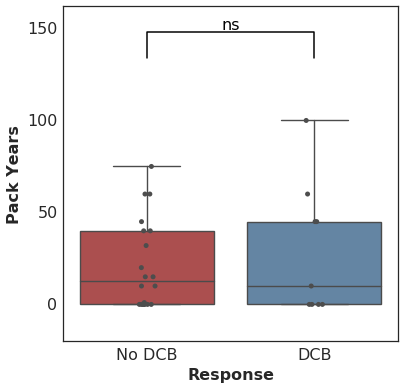

In [8]:
results = cohort.plot_benefit('Pack Years')
mann_whitney_hyper_label_printer(results, 'packyears')

# no condition 18
# with condition 11
{{{liver_pfs_logrank:n=29, log-rank p=0.024}}}
# no condition 18
# with condition 11
{{{liver_os_plot}}}
{{{liver_os_logrank:n=29, log-rank p=0.018}}}


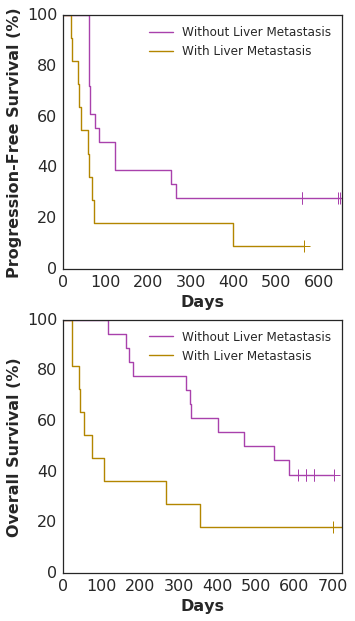

In [9]:
fig, ax = plt.subplots(2, figsize=(5, 10))

from utils.paper import logrank_formatter, hyper_label_printer
results = cohort.plot_survival(on={'Liver Metastasis': LiverMets},
                               with_condition_label='With Liver Metastasis',
                               no_condition_label = 'Without Liver Metastasis',
                               how='pfs', 
                               ax=ax[0])
hyper_label_printer(logrank_formatter, "%s_logrank" % "liver_pfs", results=results)
results = cohort.plot_survival(on={'Liver Metastasis': LiverMets},
                               with_condition_label='With Liver Metastasis',
                               no_condition_label = 'Without Liver Metastasis',
                               how='os', 
                               ax=ax[1])
survival_hyper_label_printer(results, "liver_os")

# no condition 10
# with condition 19
Results
   df: 1
   alpha: 0.95
   t 0: -1
   test: logrank
   null distribution: chi squared

   __ p-value ___|__ test statistic __|____ test result ____|__ is significant __
         0.01950 |              5.456 |      Reject Null    |        True       
{{{visceral_os_plot}}}
{{{visceral_os_logrank:n=29, log-rank p=0.020}}}


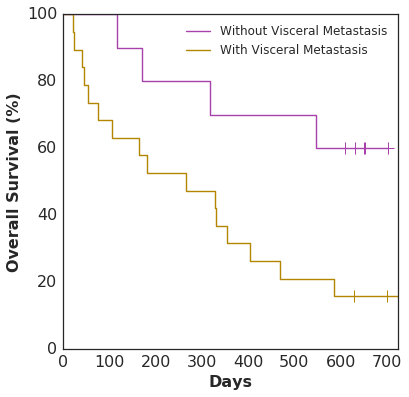

In [10]:
results = cohort.plot_survival(on={'Visceral Metastasis': VisceralMets},
                               with_condition_label='With Visceral Metastasis',
                               no_condition_label = 'Without Visceral Metastasis',
                               how='os')
results.print_summary()
survival_hyper_label_printer(results, "visceral_os")

Missing Five Factor Score = 0 or 1 for 3 patients: from 29 to 26
# no condition 16
# with condition 10
Results
   df: 1
   alpha: 0.95
   t 0: -1
   test: logrank
   null distribution: chi squared

   __ p-value ___|__ test statistic __|____ test result ____|__ is significant __
         0.31186 |              1.023 |  Cannot Reject Null |       False       
{{{fivefactor_pfs_plot}}}
{{{fivefactor_pfs_logrank:n=26, log-rank p=0.31}}}


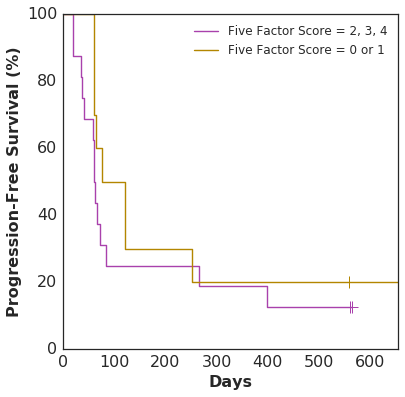

In [11]:
results = cohort.plot_survival(
    on={'Five Factor Score = 0 or 1': FiveFactorScore01},
    how='pfs',
    with_condition_label='Five Factor Score = 0 or 1',
    no_condition_label = 'Five Factor Score = 2, 3, 4'
)
results.print_summary()
survival_hyper_label_printer(results, "fivefactor_pfs")

Missing Five Factor Score = 0 or 1 for 3 patients: from 29 to 26
# no condition 16
# with condition 10
Results
   df: 1
   alpha: 0.95
   t 0: -1
   test: logrank
   null distribution: chi squared

   __ p-value ___|__ test statistic __|____ test result ____|__ is significant __
         0.12592 |              2.342 |  Cannot Reject Null |       False       
{{{fivefactor_os_plot}}}
{{{fivefactor_os_logrank:n=26, log-rank p=0.13}}}


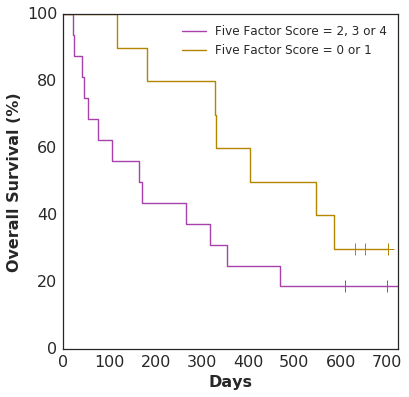

In [12]:
results = cohort.plot_survival(on={'Five Factor Score = 0 or 1': FiveFactorScore01},
                               how='os',
                               with_condition_label='Five Factor Score = 0 or 1',
                               no_condition_label = 'Five Factor Score = 2, 3 or 4'
                              )
results.print_summary()
survival_hyper_label_printer(results, "fivefactor_os")